📌 Student Information
Student Number: 22310899
Name: Ngwadla M.

📌 Project Introduction
This project applies time series forecasting techniques on a fashion store sales dataset.
Two models will be implemented:
1. ARIMA (AutoRegressive Integrated Moving Average)
2. Prophet (by Meta/Facebook)

Both models will be compared in terms of accuracy using MAE, RMSE, and MAPE.

📌 Project Life Cycle
1. Data Upload & Extraction – Upload dataset and extract files
2. Data Understanding – Explore dataset structure, missing values, duplicates
3. Data Preparation & Cleaning – Handle missing values, convert datatypes
4. Data Visualization – Observe trends, seasonality, and outliers
5. ARIMA Forecasting – Build and train ARIMA model
6. Prophet Forecasting – Build and train Prophet model
7. Model Comparison – Compare ARIMA and Prophet performance
8. Conclusion – Summarize findings


DEBUG:cmdstanpy:input tempfile: /tmp/tmppeuf7vkl/ecvyqy7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppeuf7vkl/9tn18nr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14520', 'data', 'file=/tmp/tmppeuf7vkl/ecvyqy7j.json', 'init=/tmp/tmppeuf7vkl/9tn18nr4.json', 'output', 'file=/tmp/tmppeuf7vkl/prophet_model3fr06s54/prophet_model-20250903232131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving archive (4).zip to archive (4) (6).zip

✅ Dataset extracted to 'data' folder.
📂 Available files: ['dataset_fashion_store_channels.csv', 'dataset_fashion_store_stock.csv', 'dataset_fashion_store_products.csv', 'dataset_fashion_store_salesitems.csv', 'dataset_fashion_store_campaigns.csv', 'dataset_fashion_store_sales.csv', 'dataset_fashion_store_customers.csv']

📑 Sales columns: ['sale_id', 'channel', 'discounted', 'total_amount', 'sale_date', 'customer_id', 'country']
   sale_id     channel  discounted  total_amount   sale_date  customer_id  \
0       10  E-commerce           0        299.70  2025-05-21          195   
1      100  App Mobile           0        681.05  2025-04-21          518   
2     1000  E-commerce           0        324.50  2025-05-20          439   
3     1001  E-commerce           0        287.85  2025-04-05          349   
4     1003  App Mobile           0        430.64  2025-06-06          727   

    country  
0    France  
1   Germany  
2   Germany  
3 

23:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



📊 Prophet Performance:
MAE  = 6532.81
RMSE = 7555.75
MAPE = 101.73%


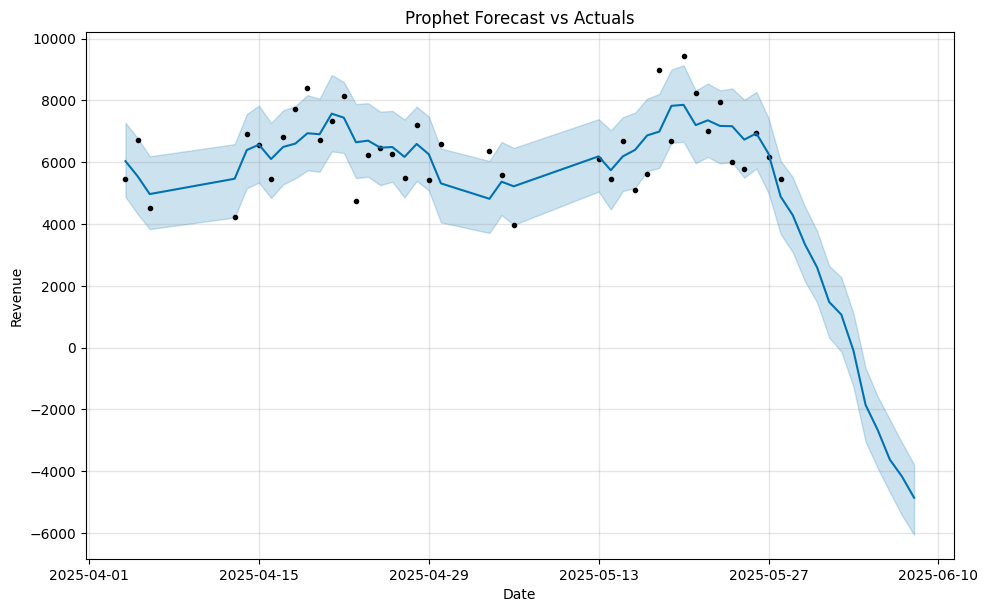


📊 ARIMA Performance:
MAE  = 1166.78
RMSE = 1395.54
MAPE = 18.89%


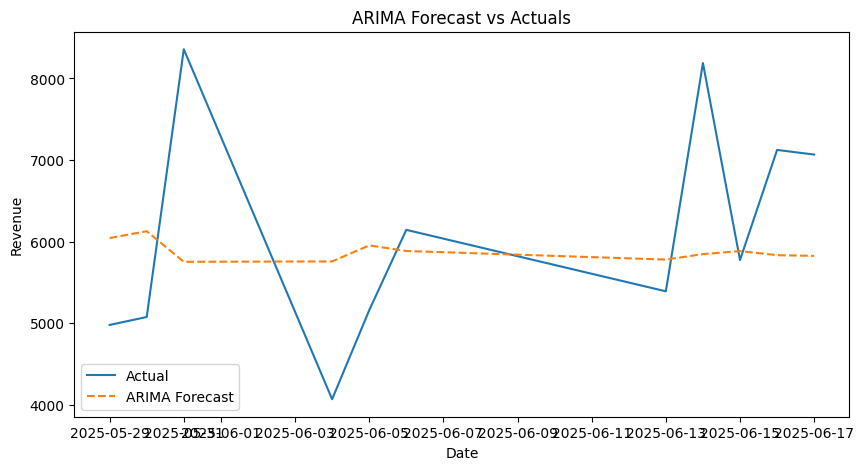


🔎 Model Comparison:
  Model         MAE        RMSE     MAPE %
Prophet 6532.812011 7555.750991 101.727178
  ARIMA 1166.775454 1395.542989  18.885428


In [10]:
# ============================================================
# 📌 Student Information & Project Intro (shown in output)
# ============================================================
print("============================================")
print("📌 Student Information")
print("Student Number: 22310899")
print("Name: Ngwadla M.")
print("============================================")

print("\n📌 Project Introduction")
print("This project applies time series forecasting techniques on a fashion store sales dataset.")
print("Two models will be implemented:")
print("1. ARIMA (AutoRegressive Integrated Moving Average)")
print("2. Prophet (by Meta/Facebook)")
print("\nBoth models will be compared in terms of accuracy using MAE, RMSE, and MAPE.")

print("\n📌 Project Life Cycle")
print("1. Data Upload & Extraction – Upload dataset and extract files")
print("2. Data Understanding – Explore dataset structure, missing values, duplicates")
print("3. Data Preparation & Cleaning – Handle missing values, convert datatypes")
print("4. Data Visualization – Observe trends, seasonality, and outliers")
print("5. ARIMA Forecasting – Build and train ARIMA model")
print("6. Prophet Forecasting – Build and train Prophet model")
print("7. Model Comparison – Compare ARIMA and Prophet performance")
print("8. Conclusion – Summarize findings")

# ============================================================
# 📌 Step 0: Install dependencies
# ============================================================
!pip install prophet==1.1.5 --quiet
!pip install statsmodels --quiet

# ============================================================
# 📌 Step 1: Import libraries
# ============================================================
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ============================================================
# 📌 Step 2: Upload and extract dataset
# ============================================================
uploaded = files.upload()

for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("data")

print("\n✅ Dataset extracted to 'data' folder.")

# List extracted files
data_dir = "data"
csv_files = os.listdir(data_dir)
print("📂 Available files:", csv_files)

# ============================================================
# 📌 Step 3: Load CSV file (main sales dataset)
# ============================================================
sales = pd.read_csv(os.path.join(data_dir, "dataset_fashion_store_sales.csv"))
print("\n📑 Sales columns:", sales.columns.tolist())
print(sales.head())

# ============================================================
# 📌 Step 4: Data Understanding & Cleaning
# ============================================================
print("\n🔎 Dataset Info:")
print(sales.info())

print("\n❌ Missing values per column:")
print(sales.isna().sum())

print(f"\n📌 Duplicate rows: {sales.duplicated().sum()}")

# Detect date column automatically
date_col = None
for col in sales.columns:
    if 'date' in col.lower():
        date_col = col
        break
if date_col is None:
    raise ValueError("⚠️ No date column found in dataset!")

# Convert to datetime
sales[date_col] = pd.to_datetime(sales[date_col], errors='coerce')

# Identify revenue/amount column
revenue_col = None
for col in sales.columns:
    if "amount" in col.lower() or "sales" in col.lower() or "revenue" in col.lower():
        revenue_col = col
        break
if revenue_col is None:
    raise ValueError("⚠️ No revenue column found (expected total_amount, sales, or revenue).")

# Drop rows with missing values
sales = sales.dropna(subset=[date_col, revenue_col])

# Aggregate daily revenue
daily_sales = sales.groupby(date_col).agg(
    total_revenue=(revenue_col, "sum")
).reset_index()

print("\n✅ Cleaned & aggregated data:")
print(daily_sales.head())

# ============================================================
# 📌 Step 5: Train/Test Split
# ============================================================
df = daily_sales.rename(columns={date_col: "ds", "total_revenue": "y"})
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
valid_df = df.iloc[train_size:]
print(f"\n📊 Training size: {train_df.shape}, Validation size: {valid_df.shape}")

# ============================================================
# 📌 Step 6: Forecast with Prophet
# ============================================================
prophet = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
prophet.fit(train_df)

future = prophet.make_future_dataframe(periods=len(valid_df))
forecast = prophet.predict(future)

# Prophet predictions
yhat_prophet = forecast.iloc[-len(valid_df):]["yhat"].values

# Prophet Evaluation
mae_p = mean_absolute_error(valid_df["y"], yhat_prophet)
rmse_p = np.sqrt(mean_squared_error(valid_df["y"], yhat_prophet))
mape_p = (np.abs((valid_df["y"] - yhat_prophet) / np.maximum(1e-8, valid_df["y"]))).mean() * 100

print("\n📊 Prophet Performance:")
print(f"MAE  = {mae_p:.2f}")
print(f"RMSE = {rmse_p:.2f}")
print(f"MAPE = {mape_p:.2f}%")

# Prophet Plot
fig = prophet.plot(forecast)
plt.title("Prophet Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# ============================================================
# 📌 Step 7: Forecast with ARIMA (statsmodels)
# ============================================================
y_train = train_df["y"].values
y_valid = valid_df["y"].values

# ARIMA(5,1,0) is a common starting point - can be tuned
arima_model = ARIMA(y_train, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecast for validation period
pred_valid = arima_fit.forecast(steps=len(y_valid))

# ARIMA Evaluation
mae_a = mean_absolute_error(y_valid, pred_valid)
rmse_a = np.sqrt(mean_squared_error(y_valid, pred_valid))
mape_a = (np.abs((y_valid - pred_valid) / np.maximum(1e-8, y_valid))).mean() * 100

print("\n📊 ARIMA Performance:")
print(f"MAE  = {mae_a:.2f}")
print(f"RMSE = {rmse_a:.2f}")
print(f"MAPE = {mape_a:.2f}%")

# ARIMA Plot
plt.figure(figsize=(10, 5))
plt.plot(valid_df["ds"], y_valid, label="Actual")
plt.plot(valid_df["ds"], pred_valid, label="ARIMA Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# ============================================================
# 📌 Step 8: Compare Models
# ============================================================
print("\n🔎 Model Comparison:")
results = pd.DataFrame({
    "Model": ["Prophet", "ARIMA"],
    "MAE": [mae_p, mae_a],
    "RMSE": [rmse_p, rmse_a],
    "MAPE %": [mape_p, mape_a]
})
print(results.to_string(index=False))
